**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

- Anomaly detection (also called outlier detection) is the process of identifying observations, events, or data points that deviate significantly from the normal or expected behavior. Such anomalies are rare, but detecting them is important because they often signal errors, fraud, faults, or novel/potentially dangerous events.

There are three common types of anomalies encountered especially in time‑series or contextual data: point anomalies, contextual anomalies, and collective anomalies. Below are definitions along with examples.

| Type                                              | Definition                                                                                                                                                                                             | Example(s)                                                                                                                                                                                                                                                                                                                                                                                              |
| ------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Point Anomaly** (Global Outlier)                | A single data point that is significantly different from the rest of the data, without needing context. It stands out globally. ([mlpro.readthedocs.io][1])                                            | - A credit card transaction for \$10,000 when typical transactions are \$50–\$200. <br> - A temperature reading of ‑20°C when all other readings are around 20‑25°C.                                                                                                                                                                                                                                    |
| **Contextual Anomaly** (Conditional Anomaly)      | A point that may look normal when considered globally, but is anomalous under a particular context (time, location, season, etc.). The context determines whether something is anomalous. ([IBM][2])   | - High home energy usage at noon might be normal during working hours but anomalous during the night. <br> - A very high sales volume on a holiday (e.g. Black Friday) — this may be normal on that date but abnormal on a non‑holiday. <br> - Stock price drops: a drop of 5% in a normally stable stock might be an anomaly only on a non‑earnings day.                                               |
| **Collective Anomaly** (Group / Sequence Anomaly) | A set (sequence / group) of data points which individually may seem normal, but together indicate abnormal behavior. Especially relevant in sequential / time‑series data. ([mlpro.readthedocs.io][1]) | - In ECG (electrocardiogram) data, a sequence of heartbeats that separately look okay but together forms an arrhythmia pattern. <br> - In network traffic, many small connections from one IP in a short time that together indicate a potential DDoS attack. <br> - A slow but steady drift in sensor readings over many time steps that eventually indicates a device is drifting out of calibration. |

[1]: https://mlpro.readthedocs.io/en/v1.9.4/content/03_machine_learning/mlpro_oa/sub/layer0_oa_stream_processing/20_anomaly_detection.html?utm_source=chatgpt.com "5.3.5. Anomaly Detection — MLPro Documentations 1.9.4 documentation"
[2]: https://www.ibm.com/topics/anomaly-detection?utm_source=chatgpt.com "What Is Anomaly Detection? | IBM"

Because different types of anomalies require different detection techniques:

- Point anomalies are often the easiest: simple statistical thresholds, distance‑based methods, etc.

- Contextual anomalies require the system to know what context is (e.g. time, location, season) and to model normal behavior in those contexts.

- Collective anomalies need methods that consider sequences, patterns over groups of points rather than individual points.

**Question 2:  Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

- Here are scenario types / use‑cases and which algorithm tends to perform best (or is more appropriate), along with trade‑offs.

 | Scenario / Data Characteristics                 | Prefer Isolation Forest When...                                                                                               | Prefer DBSCAN When...                                                                                                                                                              | Prefer LOF When...                                                                                                                                 |
| ----------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| High dimensional data                           | Isolation Forest tends to handle this better (since it does random splits rather than relying on distance/density).           | DBSCAN may struggle, because distances become less meaningful in many dimensions.                                                                                                  | LOF also suffers somewhat in very high dimensions but can still be useful if you have decent structure and you only need local outliers.           |
| Data with varying density clusters              | Isolation Forest might classify some regions poorly because “few & different” might not align with varying density structure. | DBSCAN may struggle with clusters of differing density using single eps / MinPts — may miss some clusters or misclassify many points as noise. <br> But variants/extensions exist. | LOF shines here: it is built to compare local densities, so it can more effectively detect anomalies in datasets with non‑uniform density.         |
| Need for cluster structure and separation       | If you primarily want anomalies and not clusters, Isolation Forest is simpler.                                                | DBSCAN gives both clusters and noise; good if you also care about clustering.                                                                                                      | LOF is not a clustering method; it gives anomaly scores, you won’t get cluster labels.                                                             |
| Scalability / Large datasets                    | Isolation Forest is often more scalable; tree‑based, can subsample.                                                           | DBSCAN can be heavy due to neighborhood queries; there are optimizations, but for large N and many dimensions can get slow.                                                        | LOF requires nearest‑neighbor computations for each point; can be O(n²) worst‑case; expensive for large N or high dims unless approximations used. |
| Interpretability / ranking vs binary flags      | Isolation Forest gives a “score” or path length; but interpretability (why a point is anomalous) may be less intuitive.       | DBSCAN: you get “noise” vs clusters; simpler binary decisions; less of a ranking among outliers.                                                                                   | LOF gives a continuous score; better if you want to rank anomalies by degree.                                                                      |
| Handling of global anomalies vs local anomalies | Isolation Forest is good for global outliers.                                                                                 | DBSCAN also catches outliers far from clusters (global), but may miss “subtle local” anomalies.                                                                                    | LOF is especially good for local anomalies (i.e. a point that is normal in global terms but anomalous among its neighbours).                       |
| Dealing with noise, border points               | Isolation Forest doesn’t explicitly define “noise vs clusters”. It isolates. <br> Good if you don’t need cluster definitions. | DBSCAN explicitly has notion of “noise” (points not belonging to any dense cluster) and “border” vs “core” points. Useful if noise matters.                                        | LOF also handles border effects via neighbourhood/density comparison. Sensitive to choice of neighbourhood size.                                   |


**Question 3: What are the key components of a Time Series? Explain each with one example.**

- Key Components of a Time Series

Typically, a time series is decomposed into these components:
1. Level (or Base Level)

- The baseline value around which the rest of the series fluctuates. It’s the starting “average” or constant part when no trend, seasonality or other effects are present.
Example: If a small shop’s daily average sales for a quiet period (with no growth, no holiday effect) is ₹1,000, that ₹1,000 is the level.

2. Trend
- The long‑term direction in which the data moves. It could be upward, downward, or flat. Trends can be linear or non‑linear.
Example: Suppose over 5 years, a subscription‑based software company has increasing monthly revenue from ₹20 lakh to ₹50 lakh per month. That rise is a positive trend.

3. Seasonality
- Regular and predictable fluctuations that repeat at fixed intervals (daily, weekly, monthly, yearly, etc.). Driven by calendar effects, climate, holidays, etc.
Example: An ice‑cream parlour has higher sales every summer (say May‑June) and lower in winter. So every year there is a repeating peak in Summer and trough in Winter.

4. Cyclical Component
- Fluctuations that are similar to seasonality but do not follow a fixed, known period. Their intervals and amplitudes can be irregular, often tied to economic/business cycles, external shocks, etc. Usually longer than a year, but not fixed.
Example: The real estate market might go through cycles of boom and bust over multiple years depending on interest rates, regulation, etc. The length of cycles isn’t fixed; you can’t say “every 3 years” necessarily.

5. Irregular / Random / Noise (Residual)
- The component comprising unpredictable or random variation—things not explained by the level, trend, seasonality or cycle. Measurement error, unexpected events, random fluctuations.
Example: A sudden drop in foot‑traffic in a city shop because of a power outage or a one‑off event like heavy monsoon rains; or errors in data entry; or small day‑to‑day fluctuations that are not systematic.


**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

- A time series is stationary if its statistical properties do not change over time. In particular:
        
    -  The mean is constant over time.
    -  The variance is constant over time.
    -  The autocovariance / autocorrelation structure depends only on lag, not on absolute time.

We can test whether a time series is stationary or not using a mix of visual diagnostics + statistical tests.

| Method                        | What you look for / How it works                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ----------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Visual inspection / plots** | Plot the time series. Look for trends, seasonality, changes in variance over time (e.g. “feet get bigger over time” or volatility clustering). If mean seems drifting or variance changing, likely non‑stationary. Also, look at autocorrelation plots (ACF / PACF) to see whether autocorrelations decay quickly or persist / are large across many lags. ([GeeksforGeeks][1])                                                                                                                                            |
| **Splitting into windows**    | Divide time series into several sub‑periods (e.g. first half, second half). Compute mean, variance in each. If these vary substantially, non‑stationarity.                                                                                                                                                                                                                                                                                                                                                                 |
| **Unit Root Tests**           | Test whether there is a unit root, which implies non‑stationarity of certain kinds (random walk, etc.). Some common ones: <br> • **Augmented Dickey‑Fuller (ADF) test**: Null hypothesis is that there is a unit root (i.e. non‑stationary); alternative is stationary. <br> • **Phillips‑Perron (PP) test** similar. <br> • **KPSS test**: Here the null hypothesis is that the series is stationary (or trend stationary). Alternative is non‑stationary (a unit root) or drift. Useful complement. ([GeeksforGeeks][2]) |
| **Other diagnostics**         | Checking autocorrelation decay (in a stationary series, autocorrelations should tend to zero relatively quickly unless there’s strong dependence), looking at variance over time, checking stationarity in variance (heteroscedasticity), etc. Sometimes check for structural breaks.                                                                                                                                                                                                                                      |

[1]: https://www.geeksforgeeks.org/r-machine-learning/stationarity-of-time-series-data-using-r/?utm_source=chatgpt.com "Stationarity of Time Series Data using R - GeeksforGeeks"
[2]: https://www.geeksforgeeks.org/kwiatkowski-phillips-schmidt-shin-kpss/?utm_source=chatgpt.com "Kwiatkowski-Phillips-Schmidt-Shin (KPSS) - GeeksforGeeks"

When series is non‑stationary, you may need to transform it so that models which assume stationarity can be applied. Here are common methods:

| Type of Non‑Stationarity                                            | Transformation Method(s)                                                                                                                                                                             | Example                                                                                                                                                 |
| ------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Deterministic trend** (e.g. linear increase / decrease with time) | *Detrending*: remove trend explicitly (e.g. subtract a fitted line or polynomial). <br> *Regression on time*: $y_t = \alpha + \beta t + \varepsilon_t$, then use residuals $\varepsilon_t$.          | Suppose monthly sales growing roughly linearly over years: fit a linear regression  sales vs time, subtract fitted trend to get de‑trended residuals.   |
| **Stochastic trend (unit root; random walk, etc.)**                 | *Differencing*: first difference ( $y_t - y_{t-1}$ ), second difference etc. Repeated differencing until stationarity is achieved. <br> *Log differencing* if multiplicative effects.                | An economic series like GDP which behaves like random walk with drift. Use first differencing to remove drift and random walk component.                |
| **Seasonality**                                                     | *Seasonal differencing* (subtract observation from same season in previous period, e.g. $y_t - y_{t-s}$ ). <br> Remove or model seasonality via dummy variables, decomposition, seasonal adjustment. | Monthly temperature series: subtract temperature in same month last year.                                                                               |
| **Changing variance (heteroscedasticity)**                          | *Power transformations* such as log, square root, Box‑Cox etc to stabilize variance. <br> Variance stabilizing transformations. <br> Sometimes use GARCH‑type modeling for conditional variance.     | If series has increasing volatility, applying log might reduce high values and compress scale. For example stock returns often analyzed in log‑returns. |
| **Combination**                                                     | Sometimes more than one type is present (trend + seasonality + changing variance). Use a combination: detrend, then difference, then transform variance etc.                                         |                                                                                                                                                         |


**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**

- Here’s a table summarizing the structural differences and implications:

| Model                           | Parameters / Components                                                       | Handles Trend?                     | Handles Seasonality? | Exogenous Variables?         | Assumes Stationarity?                                                                                            | Complexity / Data Needs                                                                                                           |
| ------------------------------- | ----------------------------------------------------------------------------- | ---------------------------------- | -------------------- | ---------------------------- | ---------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **AR(p)**                       | AR order $p$                                                                  | No (unless differenced externally) | No                   | No                           | Yes (the series must be stationary)                                                                              | Simpler; fewer parameters; less data needed; easier to interpret.                                                                 |
| **MA(q)**                       | MA order $q$                                                                  | No                                 | No                   | No                           | Yes                                                                                                              | Simpler; fewer parameters but difficulty in interpreting error terms.                                                             |
| **ARMA(p, q)**                  | AR + MA orders                                                                | No                                 | No                   | No                           | Yes                                                                                                              | Moderate; still only works for stationary data; p + q must be chosen carefully.                                                   |
| **ARIMA(p, d, q)**              | AR order p, MA order q, differencing order d                                  | Yes, through differencing          | No                   | No                           | After differencing; assumes stationarity of transformed series                                                   | More parameters; need enough data to estimate; need diagnosing d etc.                                                             |
| **SARIMA(p, d, q)(P, D, Q)\_s** | Adds seasonal AR P, seasonal MA Q, seasonal differencing D, seasonal period s | Yes                                | Yes, explicitly      | No (except through modeling) | After differencing & seasonal differencing; the series must be seasonal + trend stationary after transformations | Greater data needed: enough seasonal cycles; more complex model; more risk of overfitting if seasonal pattern weak or data short. |
| **SARIMAX**                     | All of SARIMA’s + exogenous variables $X_t$ with coefficients                 | Yes                                | Yes                  | Yes                          | Same as SARIMA plus assumptions about exogenous variables (linearity etc)                                        | Most complex; needs data for external vars; forecasting exogenous vars maybe needed; greater parameter estimation burden.         |


**Dataset:**

● [NYC Taxi Fare Data](https://drive.google.com/file/d/1NgjnaMX_41yLiutbeM4Dpv6yQdDf82zm/view?usp=sharing://)

● [AirPassengers Dataset](https://drive.google.com/file/d/1eu6DQtqaH2qmJZU_RU5tQe5hhYejjXW3/view?usp=sharing://)

**Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,and decompose it into trend, seasonality and residual components.**

- Here’s a typical workflow in Python using pandas + statsmodels:


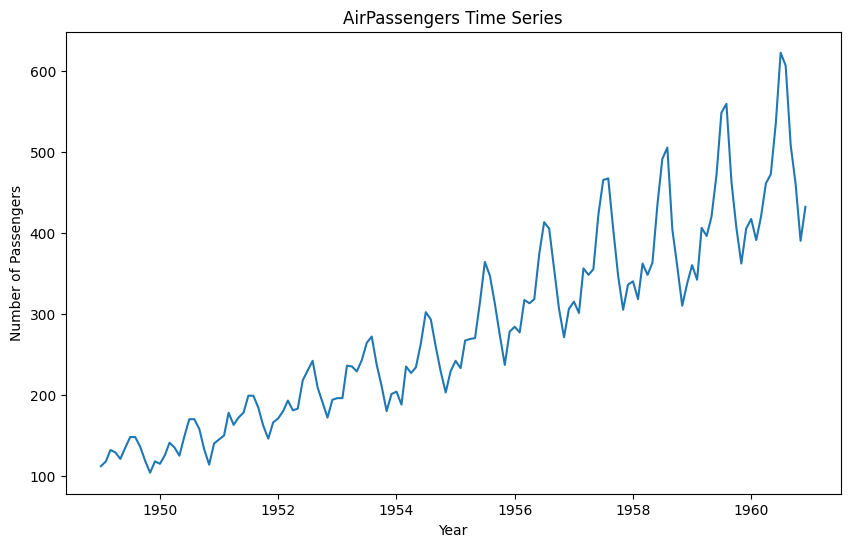

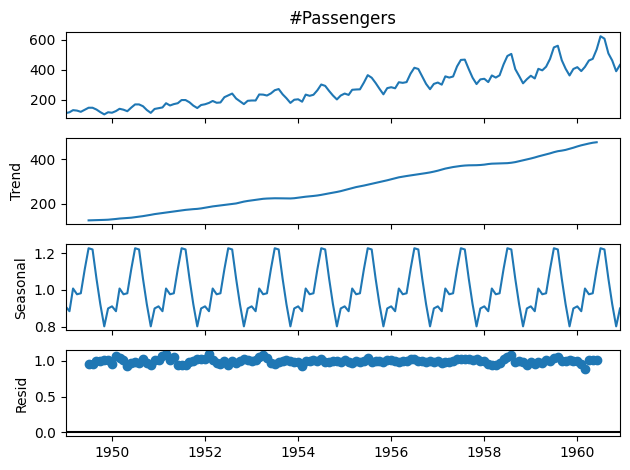

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(df['#Passengers'])
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

decomp = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
decomp.plot()
plt.show()

**Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.**

-

/tmp/ipython-input-3184846337.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC_taxi_fare_data.csv')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


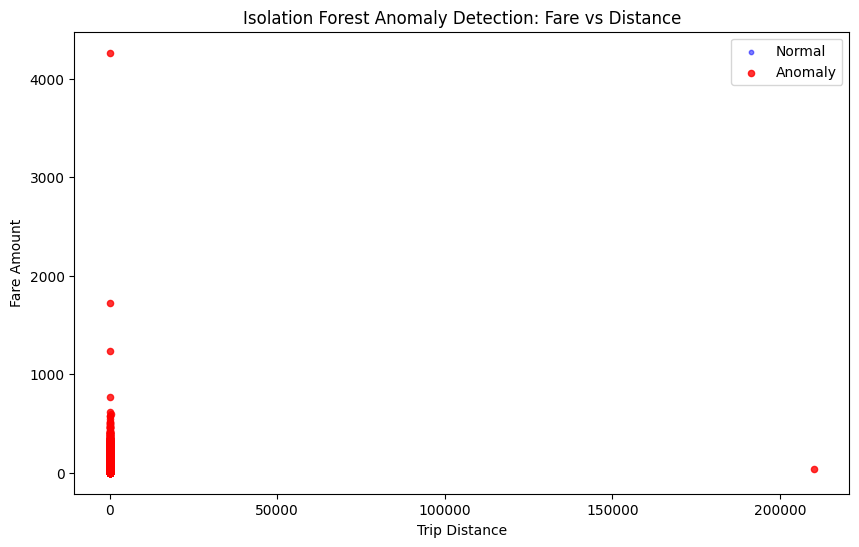

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

df = pd.read_csv('NYC_taxi_fare_data.csv')

df2 = df.copy()
df2 = df2[df2['fare_amount'] > 0]
df2 = df2[df2['trip_distance'] > 0]

features = df2[['fare_amount', 'trip_distance']].copy()

iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(features)

df2['anomaly_score'] = iso.decision_function(features)
df2['anomaly'] = iso.predict(features)

plt.figure(figsize=(10, 6))

normal = df2[df2['anomaly'] == 1]
anomalies = df2[df2['anomaly'] == -1]
plt.scatter(normal['trip_distance'], normal['fare_amount'],
            c='blue', label='Normal', alpha=0.5, s=10)
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'],
            c='red', label='Anomaly', alpha=0.8, s=20)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Isolation Forest Anomaly Detection: Fare vs Distance')
plt.legend()
plt.show()

**Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the result.**

ADF statistic: -1.7170170891069683
p‑value: 0.4223667747703874


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 220.722
Date:                            Thu, 18 Sep 2025   AIC                           -435.444
Time:                                    15:21:37   BIC                           -427.157
Sample:                                01-01-1949   HQIC                          -432.079
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4328      0.075     -5.751      0.000      -0.580      -0.285
ma.S.L12      -0.5475      0.098   

/tmp/ipython-input-1057789197.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


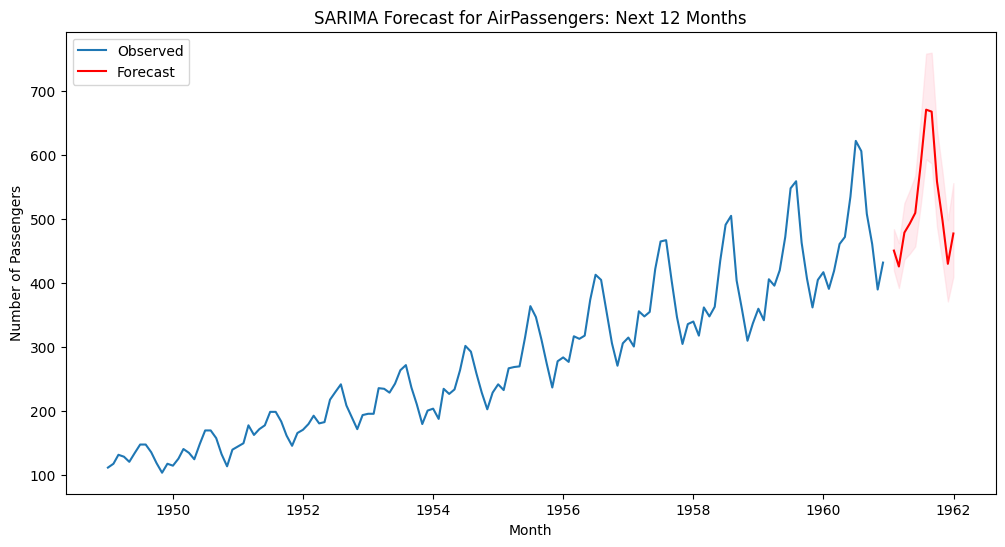

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
ts = df['#Passengers']

ts_log = np.log(ts)

result = adfuller(ts_log)
print('ADF statistic:', result[0])
print('p‑value:', result[1])

model = SARIMAX(ts_log,
                order=(0,1,1),
                seasonal_order=(0,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())

forecast_steps = 12
forecast_results = model_fit.get_forecast(steps=forecast_steps)
forecast_mean_log = forecast_results.predicted_mean
forecast_ci_log = forecast_results.conf_int()

forecast_mean = np.exp(forecast_mean_log)
ci_lower = np.exp(forecast_ci_log['lower #Passengers'])
ci_upper = np.exp(forecast_ci_log['upper #Passengers'])

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Observed')
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, ci_lower, ci_upper, color='pink', alpha=0.3)
plt.title('SARIMA Forecast for AirPassengers: Next 12 Months')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib**

- Step-by-Step: Applying LOF for Anomaly Detection
1. Import Necessary Libraries
2. Generate Synthetic Data
We'll create a dataset with two clusters of points and some outliers.
3. Apply LOF for Anomaly Detection
4. Visualize the Results

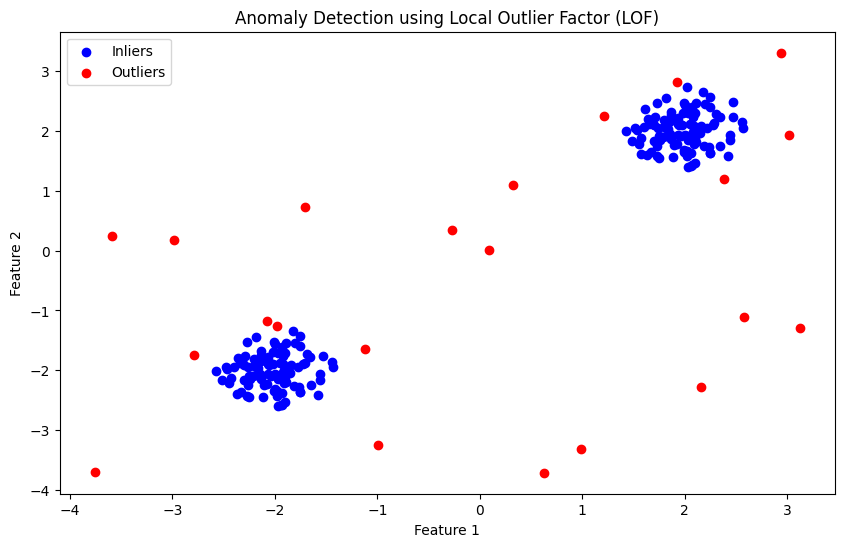

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X = np.vstack([X_inliers + 2, X_inliers - 2, X_outliers])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred = lof.fit_predict(X)

plt.figure(figsize=(10, 6))

plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', label='Inliers')

plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', label='Outliers')

plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.**

**Explain your real-time data science workflow:**

● **How would you detect anomalies in this streaming data (Isolation Forest / LOF /DBSCAN)?**

● **Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?**

● **How would you validate and monitor the performance over time?**

● **How would this solution help business decisions or operations?**

- I’ll walk through the phases: data capture & ingestion; preprocessing; anomaly detection; forecasting; validation & monitoring; and business impact.
1. Data Ingestion & Preprocessing

- Stream the consumption & metadata (timestamp, region, weather etc.) at 15‑minute intervals via a message bus (Kafka or other).

- Enrich the stream: weather forecasts or real‑time weather, calendar features (time of day, day of week, holidays).

- Maintain sliding windows of recent data (e.g. past few hours / days) for context.

- Clean/filter: missing data, sensor errors (e.g. physically impossible negative consumption), smoothing or aggregation if necessary.

2. Anomaly Detection (Real‑time)

Goal: detect abnormal spikes or drops promptly (e.g., sudden surge or drop not explained by weather or usual patterns).
- Candidate algorithms:

   - Isolation Forest

   - Local Outlier Factor (LOF)

   - DBSCAN

- Choice & rationale:

   - Isolation Forest is good for unsupervised anomaly detection, works reasonably fast, handles high‑dimensional features (region, weather, time features) well. It isolates anomalies. It’s also fairly robust to irrelevant features.

   - LOF is useful when anomalies are local relative to neighbors (e.g. sudden deviation compared to other recent intervals / similar weather/time). But it’s more computationally heavy, especially in streaming / real‑time.

   - DBSCAN is less suited for strictly streaming / online detection because it requires parameters (eps, minPts) and clustering structure; moreover, detecting small anomalies in dense traffic might be harder.

- Proposed approach:
   - Hybrid / multi‑stage anomaly detection:
1. Baseline filtering / thresholds: quick checks (e.g., if usage jumps > some % relative to recent usage, or usage < a lower bound) to catch gross anomalies.

2. Statistical / density methods: Use something like LOF or moving window LOF on features like usage, weather, region/time combos to detect local outliers.

3. Isolation Forest trained on recent historical window, periodically retrained, used to score each incoming 15‑min observation (or small batch) in near real‑time.

- Use a sliding window retraining or incremental updating to handle concept drift (usage patterns may change over time: seasons, demand, population, etc.).

- Keep anomalies flagged with metadata: region, time, weather, neighbor behavior, so they can be investigated.

3. Short‑Term Forecasting (Next few intervals / next few hours / day ahead):
Because we have 15‑minute resolution and want short‑term forecasts(e g. next hour, next few hours), we need a time series model that can handle:
- seasonal cycles (within day, across days)
- exogenous features (weather, region, possibly events)
- maybe nonstationarity

Candidate models: ARIMA, SARIMA, SARIMAX
- ARIMA: good if data is stationary (after differencing etc.), no clear seasonal cycles, or cycles are weak / small period.
- SARIMA: better when there is strong, repeating seasonality (e.g. daily patterns, day vs night, weekdays vs weekends), plus trend / nonstationarity.

- SARIMAX: best if exogenous variables are predictive (weather, temperature, humidity, region, holidays) and those variables are available (or forecastable) for the horizon we want.

Proposed model:
I’d use SARIMAX for forecasting, because:
- It lets me model seasonal components (daily cycles, weekly cycles) and include external influences (weather conditions, temperature, region).

5. Solution Architecture Sketch

Putting above together:
- Stream processors: data ingestion via Kafka (or similar), stream processing engine (Flink / Spark Streaming) to compute features, apply anomaly detection, commit anomalies & consumption to a datastore.
- Forecast service: batch or micro‑batch component that updates forecasting models, produces short‑term forecasts (per region/time), exposed via API / dashboard.
- Dashboard / alerting: visualization of current usage, forecast vs actual, anomalies flagged; alerting system (e.g. SMS / email / internal alert) when anomalies or forecast errors cross thresholds.

- Data store / model store: stores historical data, model versions, feature distributions etc.

6. Business Value / Operational Impact

How this solution helps the company / power grid operations:
- Operational reliability: early detection of abnormal consumption (spikes or drops) can signal faults (transformer failures, sensor failures, theft or leakage, unusual demands). Could trigger inspections, adjustments, load shifting.
- Demand forecast helps capacity planning: accurate short‑term forecasts let grid operators better match supply / generation, manage reserves, optimize dispatch, avoid over/under supply, reduce waste and cost.
- Preventative maintenance and asset protection: anomalies might indicate equipment issues that, if unaddressed, could cause damage or downtime.
- Cost savings: by avoiding emergency power procurement, switching on expensive peaker plants, or penalties for energy imbalance, and by more accurate scheduling.
- Customer service / pricing: ability to anticipate demand spikes (e.g. weather‐related) allows communications to customers (demand response), or dynamic pricing etc.
- Regulatory / compliance: for utilities regulated on supply reliability and grid stability, reporting and minimizing abnormal events is important.

